# Temporal and Spatial DataMining
## Exercise 03 Representation

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

### Task1: Piecewise Aggregate Approximation PAA

PAA approximates a time-series X of length n into vector $\bar{X}=(\bar{x}_{1},…,\bar{x}_{M})$ of any arbitrary length $M \leq n$ where each of $\bar{x_{i}}$ is calculated as follows:

$$\bar{x}_{i} = \frac{M}{n}\sum_{j=n/M(i-1)+1}^{(n/M)i} x_{j}$$

**a)** implement a PAA function for reducing the dimensionality of the time-series from n to M.

n: Number of input time series

M: Number of reduced time series

PS: **There are immediate special cases however**,

1. M>=n: The reduced series is exact copy of the original sequence.
2. M=1: The reduced series is the mean of the original sequence.

In [15]:
t = np.array([3.12, 2.02, 2.33, 2.99, 6.85, 9.20, 8.80, 7.50, 6.00, 5.85, 3.85, 4.85, 3.85, 2.22, 1.45, 1.34])

In [16]:
def paa(arr, n_sections:int):
    '''
    : param arr: the input time series/ signal
    : param n_sections: the number of segments/parts M to divide the time series into
    Piecewise Aggregate Approximation
    '''
    n = arr.shape[0]
    if(n <= n_sections):    # special case 1
        return arr
    if(n_sections == 1):    # special case 2
        return arr.mean()

    new_series = np.zeros(n_sections)
    section_length = int(np.floor(n / n_sections))
    for idx, i in enumerate(range(0, n, section_length)):
        if(idx == n_sections - 1): # if division is not a whole number the last section contains section_length + the rest of the division
            new_series[idx] = arr[i : ].mean()
            break
        else:
            new_series[idx] = arr[i : min(i+section_length, n)].mean()
    return new_series

print('length of original time series: ', len(t))
n_sections = 5  # M, # sections
transformed_timeseries = paa(t, n_sections)
print('transformed_timeseries: ', transformed_timeseries)
print('len of transformed timeseries: ', len(transformed_timeseries))

length of original time series:  16
transformed_timeseries:  [2.49       6.34666667 7.43333333 4.85       2.215     ]
len of transformed timeseries:  5


**b)** Plot results (Update on 28.04.2021)

**Hint**: Use [plt.step](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.step.html) to plot the reduced time series.


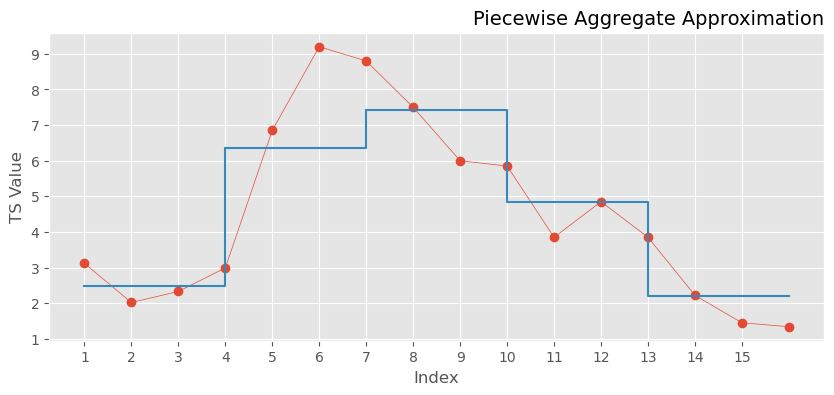

In [17]:
plt.figure(figsize=(10, 4))
plt.title("Piecewise Aggregate Approximation", size=14, loc="right")
plt.plot(range(1, len(t)+1), t, marker="o", linewidth=0.5)

### PAA results:
x = np.arange(1, len(t) + 1)
transformed_timeseries_longer = np.array([[y] * (t.shape[0] // n_sections) for y in transformed_timeseries]).flatten() # repeat each value n_sections times
if transformed_timeseries_longer.shape[0] < t.shape[0]: # if division is not a whole number the last section contains section_length + the rest of the division
    transformed_timeseries_longer = np.append(transformed_timeseries_longer, np.array([transformed_timeseries[-1]] * (t.shape[0] - transformed_timeseries_longer.shape[0])))
plt.step(x, transformed_timeseries_longer, where="post")

plt.xticks(range(1, 16))
plt.xlabel("Index")
plt.ylabel("TS Value")
plt.show()

### Task2: Piecewise Polynomial Approximation

**a)** Use **ppoly_data** to import data.

Suppose the data is generated in this way: x is from random normal with mean 0, std = 10. length of x is 1000

In [18]:
from utils.TimeSeries import ppoly_data
from sklearn.linear_model import LinearRegression
from scipy import optimize

In [19]:
x, y = ppoly_data()

**b)** plot scatter of x and y

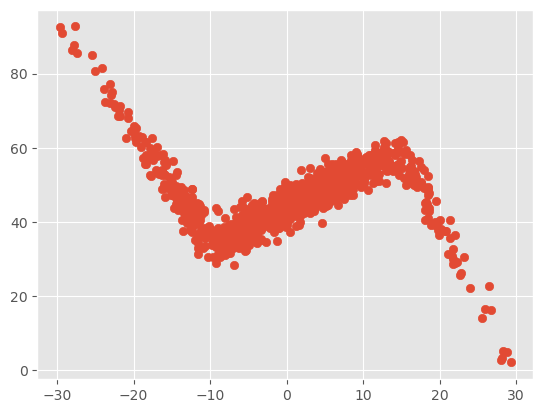

In [20]:
plt.scatter(x, y, marker="o", linewidth=0.5)

**c)** Use **[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)** to fit the data and plot it. What can you observe?

In [21]:
####################
# Your Code Here   #
####################

**d)** Piecewise linear regression. Design the function **piecewise_linear** with help of [np.piecewise](https://docs.scipy.org/doc/numpy/reference/generated/numpy.piecewise.html) and [optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). (Update on 28.04.2021)

**Hints:** 

1. There are 3 intervals. For each interval, a linear line will be fitted.

2. $y=b+k1×x+k2×(x-x0)|(x>x0)+k3×(x-x1)|(x>x1)$

3. You can refer to the [example](https://stackoverflow.com/questions/29382903/how-to-apply-piecewise-linear-fit-in-python)

In [22]:
def piecewise_linear(x, x0, x1, b, k1, k2, k3):
    ####################
    # Your Code Here   #
    ####################
    return np.piecewise(x, condlist, funclist)

In [23]:
p, e = optimize.curve_fit(piecewise_linear, x, y)

perr = np.sqrt(np.diag(e))
print(perr)

NameError: name 'condlist' is not defined

In [ ]:
# plot the fit function
####################
# Your Code Here   #
####################

### Task3: SAX  (Bonus task)

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.TimeSeries import TS_1, TS_2
from scipy.stats import norm

**a)** Implement SAX as discussed in the lecture using the given Interface. (Update on 28.04.2021)

**Hint**: The argument **as_symbol** and **from_symbol** mean that the digits are encoded to character symbols, for example, '1' -- 'a', '2' -- 'b'. Refer to the built-in functions [chr()](https://www.programiz.com/python-programming/methods/built-in/chr) and [ord()](https://www.programiz.com/python-programming/methods/built-in/ord).

In [32]:
N_SECTIONS = 30     # FIXME: wie bestimmen wir die Anzahl der Segmente?

In [36]:
class SAX:
    def __init__(self, symbols=5, n_sections:int=N_SECTIONS):  # FIXME: altered to add number of sections
        """ Initialize a new approximation objection.

        Parameters:
        ===========
        symbols - number of different symbols to be used for encoding
        """
        self.symbols = symbols  
        self.n_sections = n_sections
    
    def fit(self, X):
        """ Fit boundaries.

        Calculates mean and std from training data to be used in
        transform(X)
        
        Parameters:
        ===========
        X - time series do be used as source

        Return:
        =======
        reference to self
        """
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        self.breakpoints = [-norm.isf(1/self.symbols * (i+1), 0, 1) for i in range(self.symbols - 1)]
        return self   


    def transform(self, X, as_symbol=True):
        """
        Transform the given time series to a symbolic representation.

        Standardizes X with the parameters learned from training data.

        Arguments:
        ==========
        X - time series do be converted.

        as_symbol - boolean - whether to return the actual symbols or the indices
        """
        X_std = (X - self.mean) / self.std
        X_paa = paa(X_std, self.n_sections)

        X_sax = np.zeros_like(X_paa, dtype=int)
        for idx, x in enumerate(X_paa):
            for i, b in enumerate(self.breakpoints):
                if(x > b):
                    X_sax[idx] = i + 1
            if(x > self.breakpoints[-1]):
                X_sax[idx] = self.symbols - 1
            
                    
        if(as_symbol):
            X_symbol = []
            for i in range(len(X_sax)):
                X_symbol.append(chr(ord('a') + int(X_sax[i])))
            return np.array(X_symbol)
        return X_sax


    def reconstruct(self, S, from_symbol=True):
        """
        Reconstruct the time series from its Symbolic representation.

        Arguments:
        ==========
        S - symbolic representation of a time series

        Returns:
        ========
        Reconstructed signal from S 
        """
        if(from_symbol):
            S_int = np.zeros_like(S, dtype=int)
            for i in range(len(S)):
                S_int[i] = ord(S[i]) - ord('a')
            S = S_int
        
        S_recon = np.zeros_like(S, dtype=np.float32)
        for i in range(len(S)):
            if(S[i] == 0):
                S_recon[i] = self.breakpoints[0]
            elif(S[i] == self.symbols-1):
                S_recon[i] = self.breakpoints[-1]
            else:
                S_recon[i] = (self.breakpoints[S[i]] + self.breakpoints[S[i] - 1]) / 2
        return S_recon

standarized time series after applying PAA:  [-0.77878694 -0.74272735  1.40682476  1.45690753  0.56543437 -0.06560842
 -0.59247907 -1.24956489]
transformed_t=array([0, 0, 3, 3, 2, 1, 1, 0])


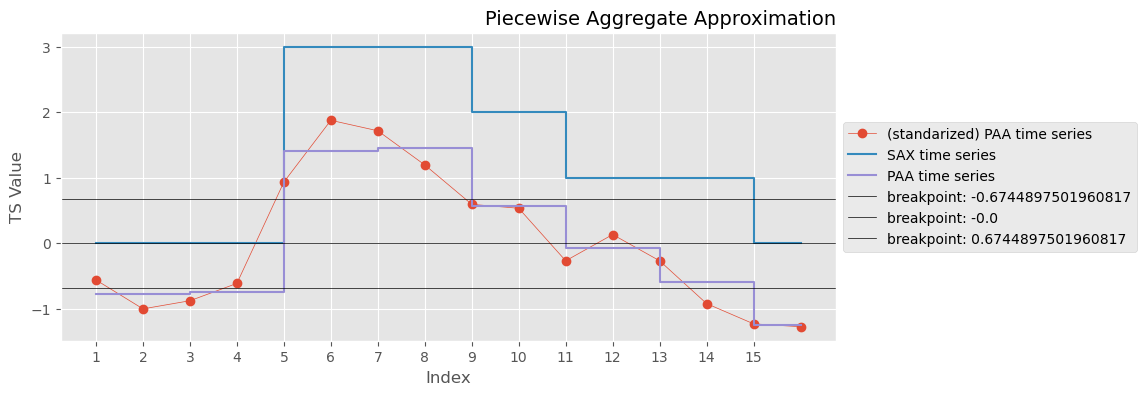

In [40]:
n_sections = 8
new_t = (t - t.mean()) / t.std()
print('standarized time series after applying PAA: ', paa(new_t, n_sections))
sax = SAX(4, n_sections=n_sections)
sax.fit(t)
transformed_t = sax.transform(t, False) # as number != as symbol
print(f"{transformed_t=}")

plt.figure(figsize=(10, 4))
plt.title("Piecewise Aggregate Approximation", size=14, loc="right")
plt.plot(range(1, len(t)+1), new_t, marker="o", linewidth=0.5, label="(standarized) PAA time series")

### PAA results:
x = np.arange(1, len(t) + 1)
plt.step(x, np.array([[y] * (t.shape[0] // n_sections) for y in transformed_t]).flatten(), where="post", label="SAX time series")
plt.step(x, np.array([[y] * (t.shape[0] // n_sections) for y in paa(new_t, n_sections)]).flatten(), where="post", label="PAA time series")
for b in sax.breakpoints:
    plt.axhline(b, c="black", label="breakpoint: {}".format(b), linewidth=0.5)

plt.xticks(range(1, 16))
plt.xlabel("Index")
plt.ylabel("TS Value")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**b)** Plot the time series **TS_1** and **TS_2**. Then calculate the similarity of the time series. 

**Note**: Normalized Euclidean distance

$d=\sqrt{\sum_{n=1}^{N}\dfrac{(\mathbf{\hat{y}}_n-\mathbf{y}_n)^2}{N}}$, where $\hat{y}_{n}$ and $y_{n}$ are the $n$ th measurement and prediction, respectively. $N$ is the number of samples.

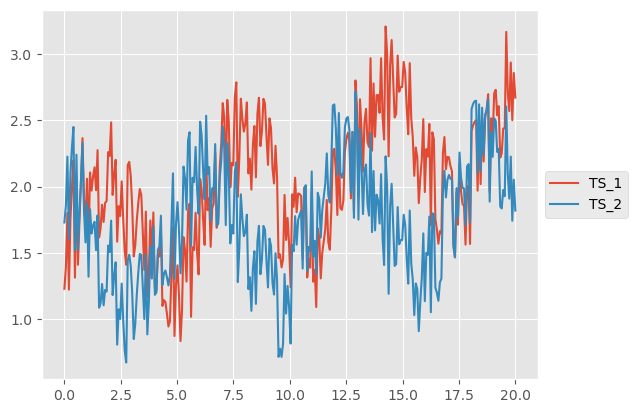

In [42]:
x,y = TS_1(x1=20, samples=300)
a,b = TS_2(x1=20, samples=300)

# plot the two time series
plt.plot(x,y, label='TS_1')
plt.plot(a,b, label='TS_2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [43]:
# calculate the normalizaed Euclidean distance
def norm_euclid(y_1, y_2):
    '''
    normalized to make time series of different lengths comparable
    '''
    return np.sqrt(np.sum(np.power(y_1 - y_2 , 2) / len(y_1)))

print(norm_euclid(y,b))

0.5681492279538091


**c)** Use SAX to convert the two time series into a character combination. Then reconstruct the time series and plot it with the original time series. (In a plot)

['c' 'f' 'f' 'f' 'd' 'c' 'a' 'a' 'b' 'e' 'i' 'i' 'i' 'j' 'c' 'd' 'b' 'd'
 'g' 'i' 'k' 'l' 'l' 'h' 'f' 'f' 'e' 'i' 'j' 'k']
['i' 'g' 'c' 'b' 'b' 'c' 'c' 'f' 'i' 'j' 'j' 'f' 'd' 'd' 'a' 'e' 'f' 'j'
 'k' 'j' 'h' 'g' 'e' 'b' 'c' 'h' 'i' 'l' 'k' 'i']


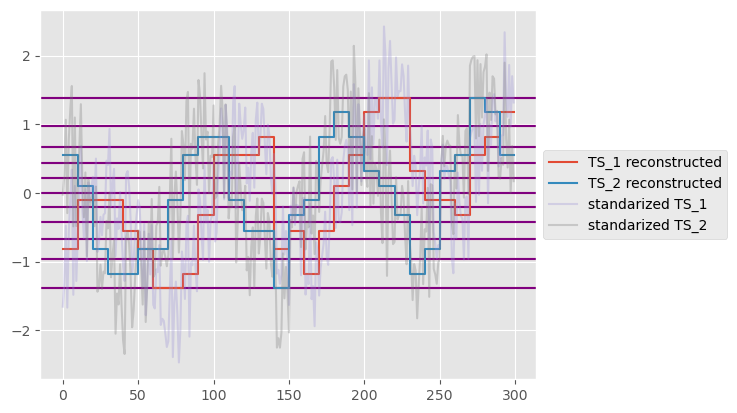

In [46]:
sax = SAX(12, n_sections=N_SECTIONS)
# print(y.shape)
# print(b.shape)
sax.fit(y)  # TS_1
y_transformed = sax.transform(y)
y_recon = sax.reconstruct(y_transformed)
for i in sax.breakpoints:
    plt.axhline(i, c="red")
sax.fit(b)  # TS_2
b_transformed = sax.transform(b)
b_recon = sax.reconstruct(b_transformed)
for i in sax.breakpoints:
    plt.axhline(i, c="blue", alpha=0.5)

print(y_transformed)
# print(y_recon)
print(b_transformed)
# print(b_recon)

plt.step(np.arange(len(x)), np.array([[i] * (len(y) // N_SECTIONS) for i in y_recon]).flatten(), where="post", label="TS_1 reconstructed")
plt.step(np.arange(len(x)), np.array([[i] * (len(b) // N_SECTIONS) for i in b_recon]).flatten(), where="post", label="TS_2 reconstructed")
plt.plot((y - y.mean()) / y.std(), alpha=0.3, label="standarized TS_1")
plt.plot((b - b.mean()) / b.std(), alpha=0.3, label="standarized TS_2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**d)** Calculate the similarity of the reconstructions with the original time series. 

In [51]:
print(y.shape, y_recon.shape)
print(norm_euclid(y, np.array([[i] * (len(y) // N_SECTIONS) for i in y_recon]).flatten()))  # worse 
print(norm_euclid(b, np.array([[i] * (len(y) // N_SECTIONS) for i in b_recon]).flatten()))  # better

(300,) (30,)
2.103199923246948
1.812956427508319


**e)** Use the following time series and repeat the procedure of task **c)** and **d)**. Which problem occurs?

In [52]:
xx,yy = TS_1(x1=200, samples=3000)
aa,bb = TS_2(x1=200, samples=3000)

['b' 'b' 'c' 'c' 'd' 'e' 'e' 'f' 'g' 'h' 'i' 'k' 'l' 'm' 'o' 'p' 'q' 's'
 't' 'u' 'w' 'x' 'y' 'y' 'z' '{' '|' '|' '}' '}']
['b' 'c' 'c' 'd' 'd' 'e' 'f' 'g' 'g' 'i' 'j' 'k' 'm' 'n' 'o' 'q' 'q' 's'
 't' 'u' 'v' 'w' 'x' 'y' 'z' 'z' '{' '|' '|' '}']


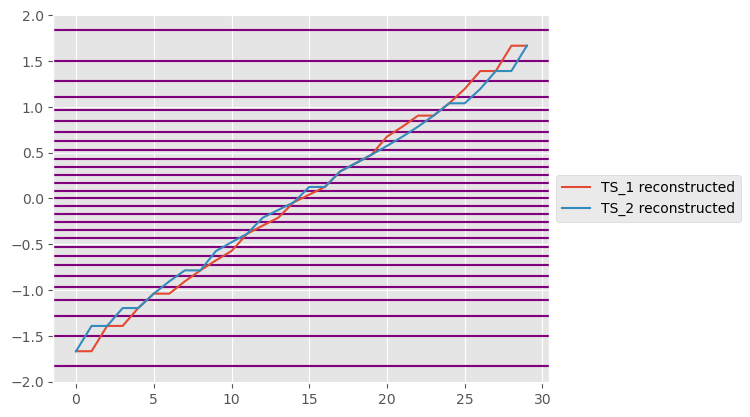

In [58]:
sax = SAX(30, n_sections=N_SECTIONS)
sax.fit(yy) # TS_1
yy_transformed = sax.transform(yy)
yy_recon = sax.reconstruct(yy_transformed)
for i in sax.breakpoints:
    plt.axhline(i, c="red")
sax.fit(bb) # TS_2
bb_transformed = sax.transform(bb)
bb_recon = sax.reconstruct(bb_transformed)
for i in sax.breakpoints:
    plt.axhline(i, c="blue", alpha=0.5)

print(yy_transformed)
# print(yy_recon)
print(bb_transformed)
# print(bb_recon)
plt.plot(yy_recon, label='TS_1 reconstructed')
plt.plot(bb_recon, label='TS_2 reconstructed')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Problem:
- data is uniformly distributed (!= normal/ gaussian)
- data has a trend
- signals are cut off at the top and the bottom

**f)** Implement a function that cleans up the trend of the time series and plot it.

**Note:** Take a look at the Numpy function **polyfit** for getting the trend.

In [62]:
def get_trend(x, y):
    """Return the trend of the given time series."""
    return np.polyfit(x, y, deg=10) # FIXME: what degree to use? (deg + 1 == # coefficients)

[-5.38772269e-20  4.84864793e-17 -1.82619211e-14  3.72269776e-12
 -4.42434266e-10  3.05638089e-08 -1.12835256e-06  1.59482754e-05
  1.48020651e-04  1.43137204e-02  1.54525108e+00]


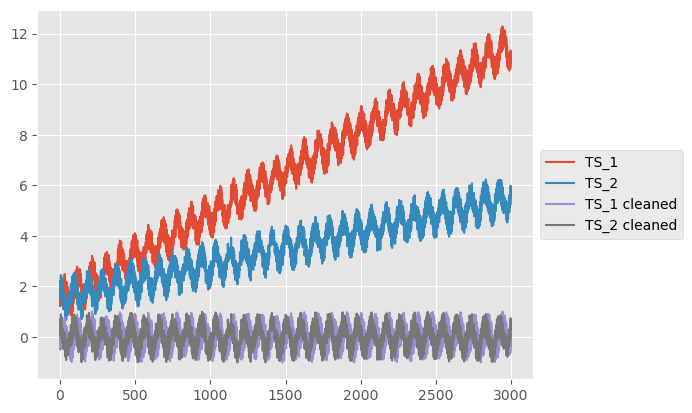

In [67]:
# Plot them and compare the original time series and the cleaned time series.

z = get_trend(xx,yy)
plt.plot(yy, label='TS_1')
plt.plot(bb, label='TS_2')
c = get_trend(aa,bb)
cleaned_yy = yy - np.polyval(z, xx)
plt.plot(cleaned_yy, label='TS_1 cleaned')
print(c)
cleaned_bb = bb -np.polyval(c, aa)
plt.plot(cleaned_bb, label='TS_2 cleaned')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

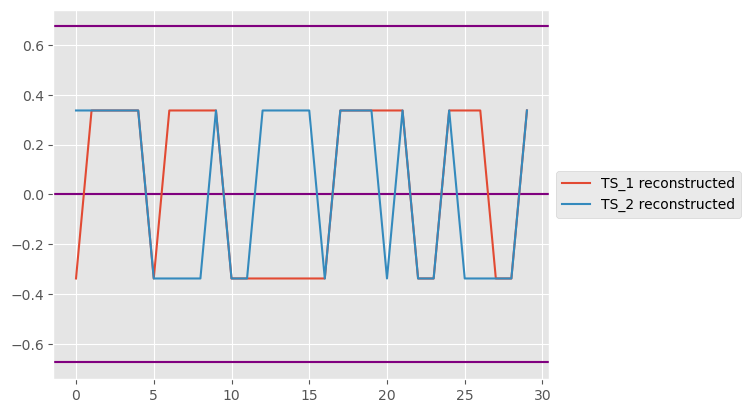

In [71]:
# Apply the SAX to the cleaned time series and plot them
# TODO: values only two options?
sax = SAX(4, n_sections=N_SECTIONS)
sax.fit(cleaned_yy) # TS_1
yy_transformed = sax.transform(cleaned_yy)
yy_recon = sax.reconstruct(yy_transformed)
for i in sax.breakpoints:
    plt.axhline(i, c="red")
sax.fit(cleaned_bb) # TS_2
bb_transformed = sax.transform(cleaned_bb)
bb_recon = sax.reconstruct(bb_transformed)
for i in sax.breakpoints:
    plt.axhline(i, c="blue", alpha=0.5)

# print(yy_transformed)
# print(yy_recon)
# print(bb_transformed)
# print(bb_recon)
plt.plot(yy_recon, label='TS_1 reconstructed')
plt.plot(bb_recon, label='TS_2 reconstructed')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()